In [1]:
import pandas as pd

In [2]:
DATADIR = 'C:\\Users\\max\\JupiterProjects\\homework_42\\names\\'

In [3]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv('{}yob{}.txt'.format(DATADIR, year), names=['Names', 'Gender', 'Count'])
names = pd.concat(names_by_year, names=['Years', 'Pos'])

In [4]:
# получаем таблицу - имя - количество за весь период
names_and_count = names.groupby('Names').sum().reset_index()

In [5]:
# функция считает согласные в именах
def consonant_count(row):
    vowels = ['a', 'e', 'i', 'o', 'u', 'y']
    count = 0
    for letter in row.Names.lower():
        if letter not in vowels:
            count += 1
    return count

In [6]:
# добавляем колонку с количеством согласных в имени
names_and_count['Consonant_count'] = names_and_count.apply(consonant_count, axis=1)

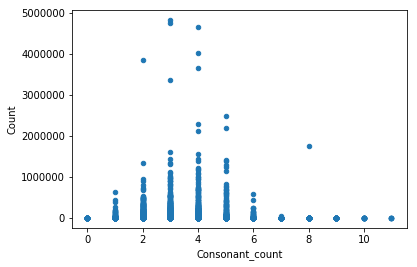

In [8]:
names_and_count.plot.scatter(x='Consonant_count', y='Count')